# Trim Race Logs


In [1]:
import os
import itertools as it
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import qgrid

In [2]:
## %matplotlib inline

In [3]:
# These are libraries written for RaceAnalysis
from global_variables import G
from nbutils import display_markdown, display
import race_logs
import process as p
import analysis as a
import chart as c
import metadata
import utils

import nbutils

# Initialize for Seattle.
G.init_seattle(logging_level="DEBUG")

In [4]:
# Info about the race logs are stored in a DataFrame.
md = metadata.read_metadata()
log_info = metadata.summary_table(md.records, "date title file source begin end".split())

# The data in this table can be editted using a QGrid Control.  Click on the column header to sort.  Click again 
# to sort in a different order.  Double click on a cell to edit.
w = qgrid.show_grid(log_info, show_toolbar=True)
w


2022-04-21 08:28:25,993|INFO|read_metadata| Read 179 records.


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

## Trimming the data 

The logs start from the time we power up until we shutdown.  And this typically inclues 30-90 mins at the dock (or more).

The UI below (which is sort of unreliable right now) can be used to find the trim points.

On the left are two "sliders" (primitive, I know).  The first is used to determine the beginning of the data to show.  The second the end.  When you are done, the results are stored in `ch.begin` and `ch.end`.

Note, for some reason the UI freezes.  If so,  you can just re-run the command.  

## Quick Visualization Interface

Below we have added a bit of additional functionality to the qgrid interface:  When you select a row, that race track will be shown automatically.

Note, it takes a second (or two) between selecting a row and the display.  Its one of the only things that are a bit slow.

<IPython.core.display.Javascript object>


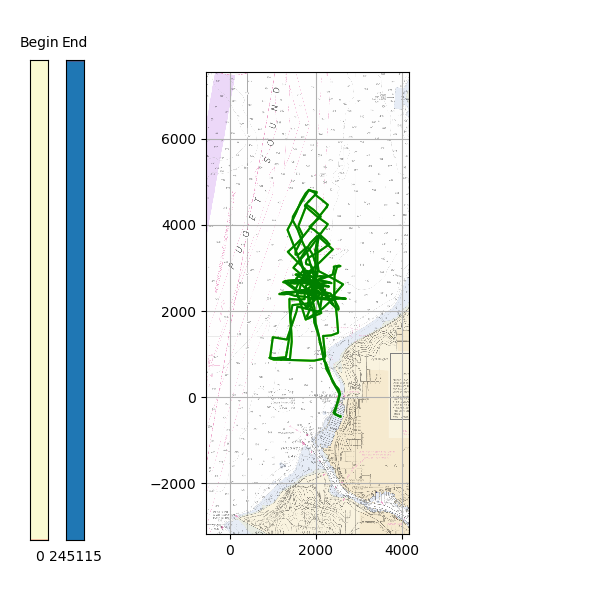

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

2022-04-21 08:28:43,831|INFO|read_metadata| Read 179 records.
2022-04-21 08:28:43,831|INFO|read_logs| Reading file 2019-10-19_09:45.pd.gz


selected row 5
displaying file: 2019-10-19 from 2019-10-19_09:45.pd.gz


2022-04-21 08:28:44,988|INFO|read_log_file| Session from 2019-10-19 16:45:36.080000, 262642 rows, 7.295555555555556 hours.
2022-04-21 08:28:47,116|INFO|read_logs| Found 262635 records before trim.
2022-04-21 08:28:47,169|INFO|read_logs| Trimming to 0 -1
2022-04-21 08:28:47,218|DEBUG|run_system_command| Running command: rm /tmp/mbtile.tif
2022-04-21 08:28:47,229|DEBUG|run_system_command| Command finished in 0.009 seconds.
2022-04-21 08:28:47,229|DEBUG|run_system_command| Running command: gdalwarp  -te -122.4540155 47.6427861 -122.3565994 47.7686820  -te_srs EPSG:4326  -t_srs ' +proj=tmerc +lat_0=47.6873070 +lon_0=-122.4386440 +k_0=0.9996 +datum=WGS84 +units=m +no_defs ' -ts 0 2000 -r bilinear Data/MBTILES/MBTILES_06.mbtiles /tmp/mbtile.tif
2022-04-21 08:28:53,727|DEBUG|run_system_command| Command finished in 6.497 seconds.
2022-04-21 08:28:53,907|DEBUG|create_figure| Creating figure Figure(600x600)
2022-04-21 08:29:10,643|INFO|read_metadata| Read 179 records.
2022-04-21 08:29:10,643|INF

selected row 0
displaying file: 2022-04-17 from 2022-04-17_10:14.pd.gz


2022-04-21 08:29:11,749|INFO|read_log_file| Session from 2022-04-17 17:14:14.070000, 191231 rows, 5.3116666666666665 hours.
2022-04-21 08:29:12,480|INFO|read_logs| Found 191230 records before trim.
2022-04-21 08:29:12,521|INFO|read_logs| Trimming to 0 -1
2022-04-21 08:29:12,549|DEBUG|run_system_command| Running command: rm /tmp/mbtile.tif
2022-04-21 08:29:12,560|DEBUG|run_system_command| Command finished in 0.011 seconds.
2022-04-21 08:29:12,561|DEBUG|run_system_command| Running command: gdalwarp  -te -122.4534444 47.6612808 -122.3791352 47.7398606  -te_srs EPSG:4326  -t_srs ' +proj=tmerc +lat_0=47.6873070 +lon_0=-122.4386440 +k_0=0.9996 +datum=WGS84 +units=m +no_defs ' -ts 0 2000 -r bilinear Data/MBTILES/MBTILES_06.mbtiles /tmp/mbtile.tif
2022-04-21 08:29:13,052|DEBUG|run_system_command| Command finished in 0.491 seconds.
2022-04-21 08:29:13,246|DEBUG|create_figure| Creating figure Figure(600x600)
2022-04-21 08:29:15,751|INFO|read_metadata| Read 179 records.
2022-04-21 08:29:15,752|IN

selected row 1
displaying file: 2022-04-16 from 2022-04-16_10:10.pd.gz


2022-04-21 08:29:17,129|INFO|read_log_file| Session from 2022-04-16 17:10:39.020000, 245117 rows, 6.808611111111111 hours.
2022-04-21 08:29:18,027|INFO|read_logs| Found 245117 records before trim.
2022-04-21 08:29:18,080|INFO|read_logs| Trimming to 0 -1
2022-04-21 08:29:18,122|DEBUG|run_system_command| Running command: rm /tmp/mbtile.tif
2022-04-21 08:29:18,132|DEBUG|run_system_command| Command finished in 0.010 seconds.
2022-04-21 08:29:18,133|DEBUG|run_system_command| Running command: gdalwarp  -te -122.4461498 47.6586862 -122.3829859 47.7552651  -te_srs EPSG:4326  -t_srs ' +proj=tmerc +lat_0=47.6873070 +lon_0=-122.4386440 +k_0=0.9996 +datum=WGS84 +units=m +no_defs ' -ts 0 2000 -r bilinear Data/MBTILES/MBTILES_06.mbtiles /tmp/mbtile.tif
2022-04-21 08:29:18,528|DEBUG|run_system_command| Command finished in 0.395 seconds.
2022-04-21 08:29:18,647|DEBUG|create_figure| Creating figure Figure(600x600)


In [5]:
# create a function that is called "back" when a row is selected

CHART = None

def trim():
    if CHART is not None and CHART.is_trimmed:
        G.logger.info("Trimming.")
        race_logs.trim_race(CHART.race, CHART.begin, CHART.end)

def show(args, _):
    global CHART
    trim()
    # Args are a bit obscure
    row_num = args['new'][0]  # The newly selected row numbers, selected the first
    print(f"selected row {row_num}")
    # Need to used the changed df, in case of reordering, etc.
    row = w.get_changed_df().iloc[row_num]
    print(f"displaying file: {row.date} from {row.file}")
    df, race = race_logs.read_date(row.date)
    CHART = c.trim_track(df, fig_or_num=fig)
    CHART.race = race

fig = plt.figure(figsize=(6, 6))
w = qgrid.show_grid(log_info, show_toolbar=True)
display(w)

# Bind the callback
w.on('selection_changed', show)


In [7]:

# optionally trim the 
trim()

2020-06-11 15:58:52,547|INFO|read_metadata| Read 50 records.
2020-06-11 15:58:52,547|INFO|save_metadata| Writing 50 records.
2020-06-11 15:58:52,548|DEBUG|ensure_directory| Directory Data/Backup alread exists.
2020-06-11 15:58:52,550|DEBUG|backup_file| Backing up Data/metadata.yml to Data/Backup/metadata.yml_00.
